# Case study on Correlation and Regression

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df=pd.read_csv('Add_sales_data_2018.csv')

In [3]:
#lets check our dataframe
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
# to convert any space in column name
column_names=df.columns
for i in column_names:
    new_name=i.replace(' ','_')
    df.rename(columns={i:new_name},inplace=True)

In [5]:
df.columns

Index(['Date', 'Add1(in_Thousands)', 'Add2(in_Thousands)',
       'Add3(in_Thousands)', 'Add4(in_Thousands)', 'Add5(in_Thousands)',
       'Profit(in_Thousands)'],
      dtype='object')

In [6]:
df.dtypes

Date                     object
Add1(in_Thousands)      float64
Add2(in_Thousands)      float64
Add3(in_Thousands)      float64
Add4(in_Thousands)      float64
Add5(in_Thousands)      float64
Profit(in_Thousands)    float64
dtype: object

In [7]:
#to check if there is any null value
df.isna().sum()

Date                    0
Add1(in_Thousands)      0
Add2(in_Thousands)      0
Add3(in_Thousands)      0
Add4(in_Thousands)      0
Add5(in_Thousands)      0
Profit(in_Thousands)    0
dtype: int64

In [8]:
df.describe()

,Add1(in_Thousands),Add2(in_Thousands),Add3(in_Thousands),Add4(in_Thousands),Add5(in_Thousands),Profit(in_Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


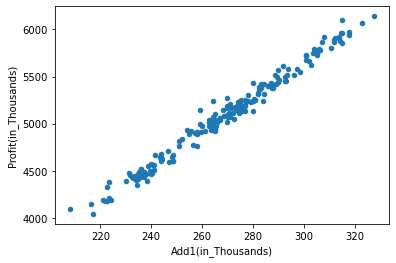

In [10]:
#plotting scatter plot 
df.plot(kind='scatter',x='Add1(in_Thousands)',y='Profit(in_Thousands)')
plt.show()


We can see that there is linear relationship between amount spend and profit for add1


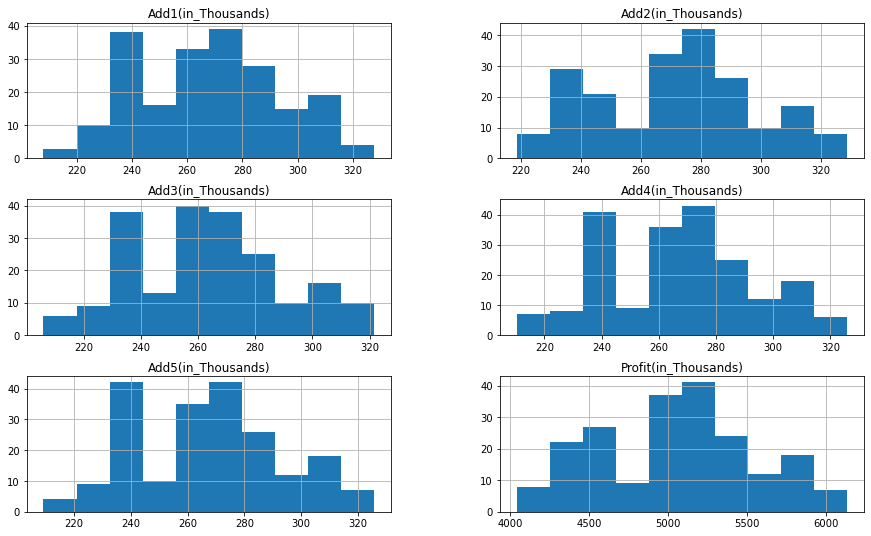

In [11]:
#lets plot histogram
df.hist(figsize=(15,9))
plt.show()

# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

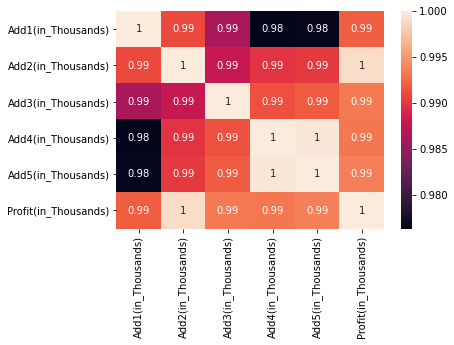

In [12]:
#lets check if there is any correlation
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='rocket')
plt.show()

From the above heatmap we can see that amount spend by company 2(add2) and profit are highly correlated.
Though all other are correlated to profit but less than add2

In [82]:
#assigning x and y values
x=df.drop(['Date','Profit(in_Thousands)'],axis=1)
y=df['Profit(in_Thousands)']

In [83]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.15)


In [84]:
x_train.shape

(174, 5)

In [85]:
x_test.shape

(31, 5)

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [86]:
#Linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
Linear_model=lr.fit(x_train,y_train)

In [99]:
#to predict the outcome
predict=Linear_model.predict(x_test)
predict

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615])

In [88]:
#to check the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(predict,y_test)

6.137146480232141e-25

In [89]:
#to check r^2 score
from sklearn.metrics import r2_score
r2_score(predict,y_test)

1.0

In the above linear regression model we can see that we do have a  mean squared error 6.137146480232141e-25 . we can  remove add5 column which is highly correlated to add4 to minimise the Mean squared error and we can see that r^2 value is 1. Which means our model is over fit. 

In [94]:
# lets see the coefficient values
pd.DataFrame(lr.coef_,x.columns,columns=['coeff'])

,coeff
Add1(in_Thousands),1.00
Add2(in_Thousands),12.38
Add3(in_Thousands),3.50
Add4(in_Thousands),1.00
Add5(in_Thousands),0.90


We can also say that add2 has large coefficient , it means that add2 has large impact on profit when compared to other features

In [96]:
#using Lasso regression
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso_model=lasso.fit(x_train,y_train)

In [98]:
lasso_predict=lasso_model.predict(x_test)
lasso_predict

array([4151.89977674, 4446.52267744, 5133.90341585, 4908.57027169,
       5002.97255771, 4623.89962148, 5383.92101547, 5328.01595995,
       5175.76206965, 5955.92820945, 5780.71578657, 4997.78999151,
       5075.89055744, 5785.64993251, 4936.25347145, 5065.82970296,
       4191.03145337, 5034.66762037, 5017.2346376 , 5135.02142774,
       5145.09093441, 5421.12836006, 4569.26887293, 4598.69538764,
       4435.79805675, 4175.90769075, 5617.90509956, 5667.19925236,
       4648.64245371, 5717.41258392, 5001.81321932])

In [100]:
#mean squared error
mean_squared_error(lasso_predict,y_test)

0.4677483140953108

In [101]:
#r^2
r2_score(lasso_predict,y_test)

0.999998006691047

From the two regression model, we can see that lasso model is best model when compared to linear regression, it has lowest mean squared error and r^2 value is 0.9.

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [102]:
#predicted profit using linear regression
values=[290,312,309,298,320]
y_pred_lr=lr.predict([values])

In [103]:
y_pred_lr

array([5820.06])

The profit which company generated by spending amount is 5820.06 by linear regression model

In [104]:
#predicted profit using lasso regression
y_pred_lasso=lasso.predict([values])

In [105]:
y_pred_lasso

array([5806.02317784])

The profit which company generated by spending amount is 5806.02 by lasso regression model

We can see that the above two regression gives approximately same values but we can go for lasso model to predict the future profit, as its r2 value and mean squared value is less when compared to linear regression. 